# Homework 3 of "Fundamentals of 3D Computer Vision"
<div style="text-align: center">
<h1 style = "color: red"> Sharif University Of Technology</h1>
<h2 style = "color: green"> Professor Shohreh Kasaei </h2>
<h3 style = "color: cyan"> Related TA: AmirHossein Razlighi <h3>
<h4 style = "color: white"> Ask your questions via quea or <a href="mailto:arazlighi@gmail.com">email</a></h4>
<h5> Save your file with format: STUDENT NUMBER_HW3.ipynb or .zip </h5>
</div>

## Question 1: Understanding Rotations in-depth! [45 points]

In this question, we want to visualize some rotations in 3D Space. we will get to understand what aee quateenions, and eotation mateices. We will also see how to conveet between these eepeesentations.

### Quateenions
We know that going feom _eeal Numbees_ which aee 1 dimensional to _Complex Numbers_, we add an axis such that:
$$
Complex\_Number = a + bi
$$
$$
a , b \in \mathbb{R}
$$

Now, what are quaternions? Let's add an axis to the complex numbers! That is quite abstract such that we can not even imagine what it means, right? But it turns out to be a powerful mathematical approach for representing rotations! Let's see how we can represent quaternions:

$$
Quaternion = a + bi + cj + dk
$$
$$
a , b , c , d \in \mathbb{R}
$$

where $i , j , k$ are the imaginary units.

<div style = "text-align:center"><img src="./Images/axis-angle.png" /></div>

As you can see, these abstract terms actually mean something! The first parameter (namely, $a$ in our example) is the angle of rotation and the rest, show the vector of rotation. So, we can represent a rotation in 3D space with a quaternion. But how can we convert between quaternions and rotation matrices? Let's see!

In [1]:
%pip install numpy matplotlib plotly nbformat scipy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


**Note**: You **CAN *NOT*** use ready to use Rotation functions such as `scipy.spatial.transforms` or `cv2`. You should implement the functions yourself. The imported `scipy` library is used in another cases further (and to test your code).

[35 points]

In [4]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

class Rotation:
    def __init__(self):
        pass

    def from_quat(self, w, x, y, z):
        # TODO: Should return a Rotation object with the given quaternion parameters
        parameters = (w, x, y, z)
        rotation = Rotation()
        rotation.parameters = parameters
        # rotation.matrix = self.as_matrix(self)
        return rotation
        

    def from_matrix(self, matrix):
        # TODO: Should return a Rotation object with the given rotation matrix
        rotation = Rotation()
        rotation.matrix = matrix
        # rotation.parameters = rotation.as_quat(self)
        return rotation

    def as_matrix(self):
        # TODO: Should convert the Rotation object to a rotation matrix and return the resulting matrix
       
        q0 = self.parameters[0]
        q1 = self.parameters[1]
        q2 = self.parameters[2]
        q3 = self.parameters[3]
        
        e00 = 2 * (q0 * q0 + q1 * q1) - 1
        e01 = 2 * (q1 * q2 - q0 * q3)
        e02 = 2 * (q1 * q3 + q0 * q2)
     
        e10 = 2 * (q1 * q2 + q0 * q3)
        e11 = 2 * (q0 * q0 + q2 * q2) - 1
        e12 = 2 * (q2 * q3 - q0 * q1)
        
        
        e20 = 2 * (q1 * q3 - q0 * q2)
        e21 = 2 * (q2 * q3 + q0 * q1)
        e22 = 2 * (q0 * q0 + q3 * q3) - 1

        self.matrix = np.asarray([[e00, e01, e02], [e10, e11, e12], [e20, e21, e22]])

        return self.matrix

        

       

    def as_quat(self):
        #TODO: Should convert the Rotation object to a quaternion and return the resulting quaternion

        matrix = self.matrix
        q0 = np.sqrt(1 + matrix[0][0] + matrix[1][1]+matrix[2][2])/2
        q1 = (matrix[2][1]-matrix[1][2])/(4*q0)
        q2 = (matrix[0][2]-matrix[2][0])/(4*q0)
        q3 = (matrix[1][0]-matrix[0][1])/(4*q0)


        return (q0, q1, q2, q3)

    def apply(self, vector):
        return self.matrix @ vector
    

## Visualizing a Quaternion [10 points]

Here, we want to rotate a sample vector in 3D space w.r.t a quaternion. You can use the `Rotation` class that you defined above. Visualze the original vector, the rotation vector (which is shown by x, y and z components of quaternion) and the final rotated vector.

In [5]:
original_vector = np.array([3, 5, 7])
original_vector = original_vector / np.linalg.norm(original_vector)

rotation_quaternion = np.array([0.25, 0.5, 0.15, 0.05]) # in the order (q_0, q_1, q_2, q_3)

rotation_vector = rotation_quaternion[1:]


rotation_object = Rotation().from_quat(*rotation_quaternion)
rotation_matrix = rotation_object.as_matrix()

rotated_vector = rotation_matrix @ original_vector

# rotation_axis_quat = ...

# Do the visualizations using plotly
#TODO: Visualize original_vector, rotation_axis_quat and rotated vector


fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

x_orig, y_orig, z_orig = [0, original_vector[0]], [0, original_vector[1]], [0, original_vector[2]]
x_rot, y_rot, z_rot = [0, rotated_vector[0]], [0, rotated_vector[1]], [0, rotated_vector[2]]
x_rot_vec, y_rot_vec, z_rot_vec = [0, rotation_vector[0]], [0, rotation_vector[1]], [0, rotation_vector[2]]


fig.add_trace(go.Scatter3d(x=x_orig, y=y_orig, z=z_orig, mode='lines+markers', name='Original Vector',
                           marker=dict(size=8, color='blue', opacity=0.8)),
              row=1, col=1)

fig.add_trace(go.Scatter3d(x=x_rot, y=y_rot, z=z_rot, mode='lines+markers', name='Rotated Vector',
                           marker=dict(size=8, color='red', opacity=0.8)),
              row=1, col=1)

fig.add_trace(go.Scatter3d(x=x_rot_vec, y=y_rot_vec, z=z_rot_vec, mode='lines+markers', name='Rotation Vector',
                           marker=dict(size=8, color='green', opacity=0.8)),
              row=1, col=1)


fig.update_layout(scene=dict(xaxis=dict(title='X-axis'), yaxis=dict(title='Y-axis'), zaxis=dict(title='Z-axis')),
                  title='Original, Rotated Vectors, and Rotation Vector')


fig.show()


### Testing your implementations 
(Your implementations should pass the tests below. **Don't** change the codes in these cells. Just run them!)

In [6]:
from scipy.spatial.transform import Rotation as R

# Testing your code (Do not change this part of the code)
for i in range(5):
    original_vector = np.random.rand(3)
    original_vector = original_vector / np.linalg.norm(original_vector)
    rotation_quaternion = np.random.rand(4)
    rotation_quaternion = rotation_quaternion / np.linalg.norm(rotation_quaternion)
    rotation_object = Rotation().from_quat(*rotation_quaternion)
    rotation_matrix = rotation_object.as_matrix()
    rotated_vector = rotation_object.apply(original_vector)
    assert np.allclose(
        rotation_matrix,
        R.from_quat(rotation_quaternion[[1, 2, 3, 0]]).as_matrix(),
        atol=1e-6,
        rtol=1e-6,
    )

    assert np.allclose(
        rotated_vector,
        R.from_quat(rotation_quaternion[[1, 2, 3, 0]]).apply(original_vector),
        atol=1e-6,
        rtol=1e-6,
    )

In [7]:
# Testing your code (Do not change this part of the code)
for i in range(5):
    original_vector = np.random.rand(3)
    original_vector = original_vector / np.linalg.norm(original_vector)
    rotation_matrix = R.random().as_matrix()
    rotation_object = Rotation().from_matrix(rotation_matrix)
    rotation_quaternion = rotation_object.as_quat()
    rotated_vector = rotation_object.apply(original_vector)
    
    assert np.allclose(
        rotation_quaternion,
        R.from_matrix(rotation_matrix).as_quat()[[3, 0, 1, 2]],
        atol=1e-6,
        rtol=1e-6,
    ) or np.allclose(
        rotation_quaternion,
        -R.from_matrix(rotation_matrix).as_quat()[[3, 0, 1, 2]],
        atol=1e-6,
        rtol=1e-6,
    )

    assert np.allclose(
        rotated_vector,
        R.from_matrix(rotation_matrix).apply(original_vector),
        atol=1e-6,
        rtol=1e-6,
    )

# Question 2: Estimating Camera Pose from 2D-3D correspondences [55 points]

In this question, you are given a set of 2D-3D correspondences. You are also given the intrinsic parameters of the camera. You need to estimate the pose of the camera (R & T) in the world coordinate system. Let's start!

- Step1: Creating the dataset (Corresponding 3d-2d points):
  
  Just run the cell below without changing it!

In [12]:
from scipy.spatial.transform import Rotation as R
import numpy as np

rot = R.random().as_matrix()
trans = np.array([5, 10, 15])

_3d_points = np.random.rand(100, 3)
_3d_points = _3d_points - np.mean(_3d_points, axis=0)
_3d_points_normalized = _3d_points / np.linalg.norm(_3d_points, axis=1)[:, None]


_2d_points = []
for i in range(100):
    _2d_points.append(rot @ _3d_points_normalized[i] + trans)

_2d_points = np.array(_2d_points)
_2d_points[:, :] /= _2d_points[:, 2][:, None]

[10 points]

In [13]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

x1, y1, z1 = _3d_points[:, 0], _3d_points[:, 1], _3d_points[:, 2]
x2, y2, z2 = _2d_points[:, 0], _2d_points[:, 1], _2d_points[:, 2]

fig.add_trace(go.Scatter3d(x=x1, y=y1, z=z1, mode='markers', name='3d points', marker=dict(size=5, color='red')),
              row=1, col=1)

fig.add_trace(go.Scatter3d(x=x2, y=y2, z=z2, mode='markers', name='2d points', marker=dict(size=5, color='blue')),
              row=1, col=1)


fig.update_layout(scene=dict(xaxis=dict(title='X-axis'), yaxis=dict(title='Y-axis'), zaxis=dict(title='Z-axis')),
                  title='3d and 3d points')

fig.show()
#TODO

### Estimate the Pose matrix(H) using LSE method and the given dataset:

We know that for converting a 3D point to a 2D point, we can use the following equation:
$$
\lambda x = K (RX + T)
$$

Here, for the sake of simplicity, consider $K=I$ and $\lambda = 1$. So, we have:
$$
x = RX + T
$$

We can stack $R \& T$ together in an $H$ matrix (you may seen this as $g$ in the course's slides) and write this as:
$$
x = HX
$$

**Here, the task is simply estimating the matrix $H$, given the data correspondences we had earlier. Use LSE to estimate the matrix H and then print it out. You can use Regularization term and any desired number of iterations to reach your desired accuracy.**

[35 points]

In [18]:
#TODO: Do LSE on the 2D and 3D points to recover the pose of camera
_3d_points_normalized_lse = np.asarray(_3d_points_normalized)
_3d_points_homo = np.concatenate((_3d_points_normalized_lse, np.ones((_3d_points.shape[0], 1))), axis=1)

X = _3d_points_homo
x = _2d_points

H_estimated, residuals, rank, s = np.linalg.lstsq(X, x, rcond=None)

print("Estimated Matrix H:")
print(H_estimated)

Estimated Matrix H:
[[-5.16772586e-02  3.22439373e-02  1.30743997e-16]
 [-4.61236974e-02 -6.55263680e-02  3.33066907e-16]
 [-1.02521906e-02  3.31922324e-02 -3.60159317e-17]
 [ 3.33846372e-01  6.67491955e-01  1.00000000e+00]]


[10 points]

In [19]:
# Calculate the reprojection error
#TODO
print(sum(residuals))

0.000306471282076659


## Question 3: Image Mosaicing [**Extra** 30 points]

The task of image mosaicing is something we use everyday to create panoramas. In this question, we want to create a panorama from a set of images. We will use the homography matrix to do so. Let's start!

**NOTE**: You can use `cv2` library and its functions to do the task and there is no need to implement them from scratch.

In [61]:
%pip install opencv-python


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np

Steps for image mosaicing:

1. Find KeyPoint in 2 images (frame n and frame n+1)
2. Match the keypoints to find the nearest neighbors of each pixel.
3. Estimate the Homography matrix using the matched keypoints.
4. Use the homography matrix to warp the images and create the panorama.

Let's start doing these steps!

### Find Keypoints in 2 images
Read the images from `./Images_Question3`. They are named `image1` to `image4`. Set the origin image to 1st image and the destination image to 2nd. We need to find important features in the images so we can understand the correspondence between them. How? Here we simply use `SIFT` algorithm to find the keypoints. You can use `cv2.SIFT_create()` to create a SIFT object and then use `sift.detectAndCompute()` to find the keypoints and descriptors. You can also use `cv2.drawKeypoints()` to draw the keypoints on the images.

### Match the keypoints to find nearest pixels
Now, we have 2 descriptors of the images, thanks to SIFT! These 2 are used to describe the image and everything in them. Now, we want to find the nearest neighbors of each pixel in origin to find out which pixel is the closest to it, in destination. Here again, you can use opencv functions for ease! Just use BruteForce matcher:
```python
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
```
The `matches` object now contains the matches between these 2 images. you can access each item and it's info in matches. For example:
```
all_matches_idxs = [(m.trainIdx, m.queryIdx) for m, n in matches]
```

### .Estimate Homography matrix

What is a homography matrix? You are familiar with _Homogeneous_ Matrices to represent pose of a camera. Now, suppose we see everything in our world as planar! So, we project every 3d point to a specific plane in the world, because in panorama images, we don't care about depth, do we?! Let's loook at the image below to understand it better:

<div style = "text-align:center"><img src="./Images/homography_transformation.jpg" /></div>

You can read more about it (and it's recommended!). But if you don't want to, it's allrigh! You just think of it as a **Transformation between points in image 1 and image 2**. In opencv, we do:
```
(H, status) = cv2.findHomography(pts1, pts2, cv2.RANSAC, reprojThreshold)
```


### Use the homography matrix to warp the images and create the panorama
Finally, simply we should bring the image2 corresponding points (in camera view 1) and then append them together in an image. So, We have $H$ which transforms points from view 1 to view 2 and vice verca. We simply use opencv to do the projection:

```
            result = cv2.warpPerspective(
                img1_orig,
                H,
                (img1_orig.shape[1] + img2_orig.shape[1], img1_orig.shape[0]),
            )
            result[0 : img2_orig.shape[0], 0 : img2_orig.shape[1]] = img2_orig
```


[You get all 30 extra points, if you implement **all of the parts** correctly and get the *correct results*!]

In [ ]:
# _. Load the images
# 1. Detect the keypoints and compute the descriptors
# 2. Match the keypoints
# 3. Draw the matches
# 4. Calculate the homographic matrix
# 5. Warp the image
# In each step, you should plot the images that are being matched (for mosaicing), the matched image (using cv2.drawMatchesKnn) and the panorama image created until that step

In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def stitch_images(image1, image2):
   

    sift = cv2.SIFT_create()

    keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

    
    bf = cv2.BFMatcher()

    
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.8 * n.distance:
            good_matches.append(m)

    
    img_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(12, 10))
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.title('Matches between Image 1 and Image 2')
    plt.axis('off')
    plt.show()

    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)



    #width is not clear so I just made it equal to sum of images' widths
    result_width = image1.shape[1] + image2.shape[1]
    result_height = image1.shape[0]
   
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    result = cv2.warpPerspective(image1, H, (result_width, result_height))
    result[0:image2.shape[0], 0:image2.shape[1]] = image2

    plt.figure(figsize=(15, 15))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title('Stitched Image')
    plt.axis('off')
    plt.show()

    return result


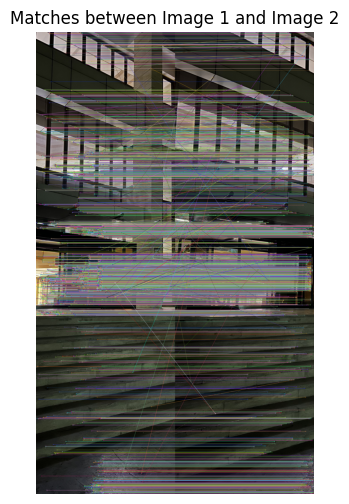

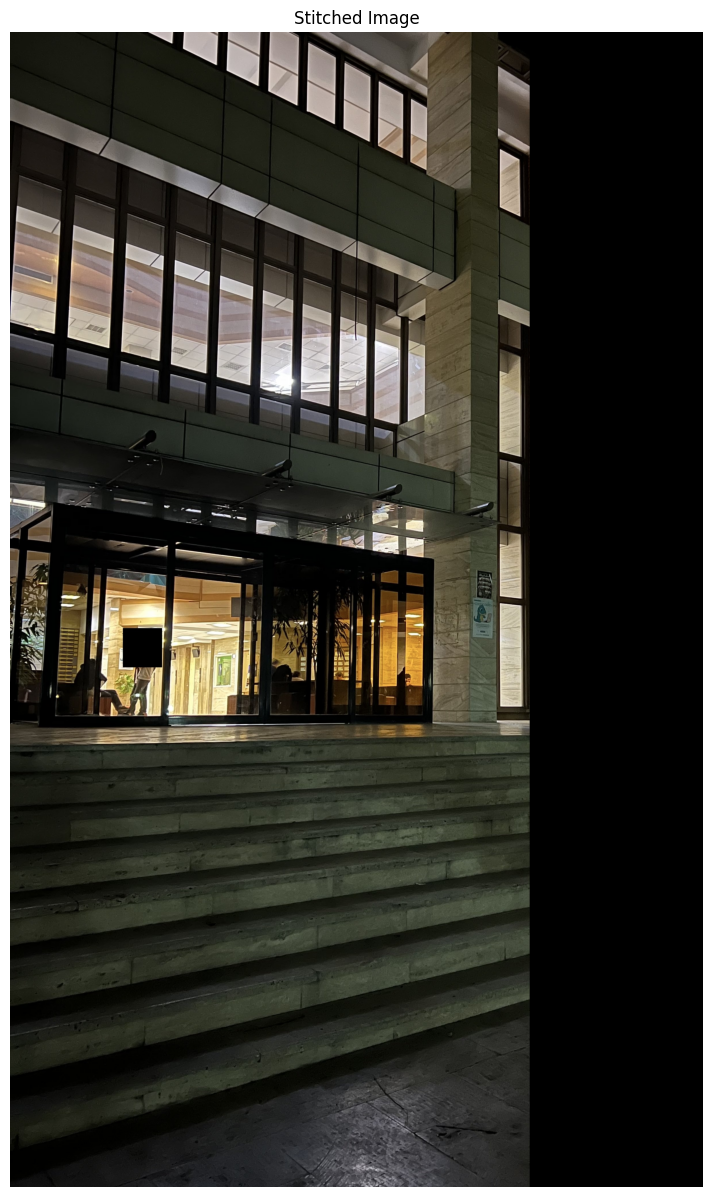

In [45]:
img1 = cv2.imread('Images_Question3/image1.jpg', cv2.COLOR_BGR2RGB)
img2 = cv2.imread('Images_Question3/image2.jpg', cv2.COLOR_BGR2RGB)
img3 = cv2.imread('Images_Question3/image3.jpg', cv2.COLOR_BGR2RGB)
img4 = cv2.imread('Images_Question3/image4.jpg', cv2.COLOR_BGR2RGB)

result1 = stitch_images(img2, img1)

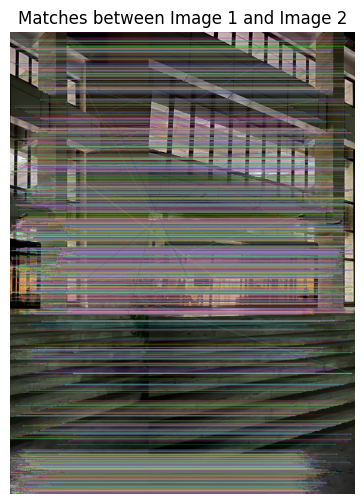

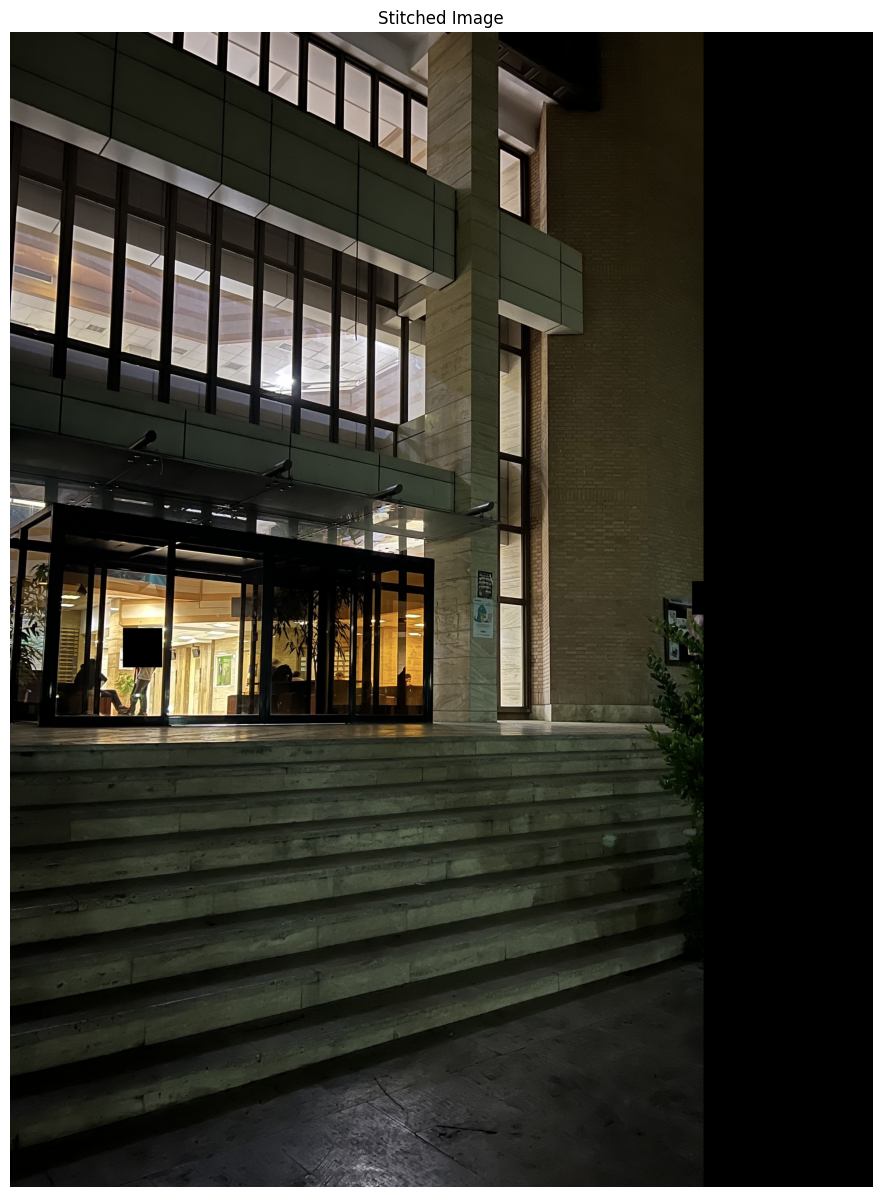

In [44]:
result1 = stitch_images(img3, result)

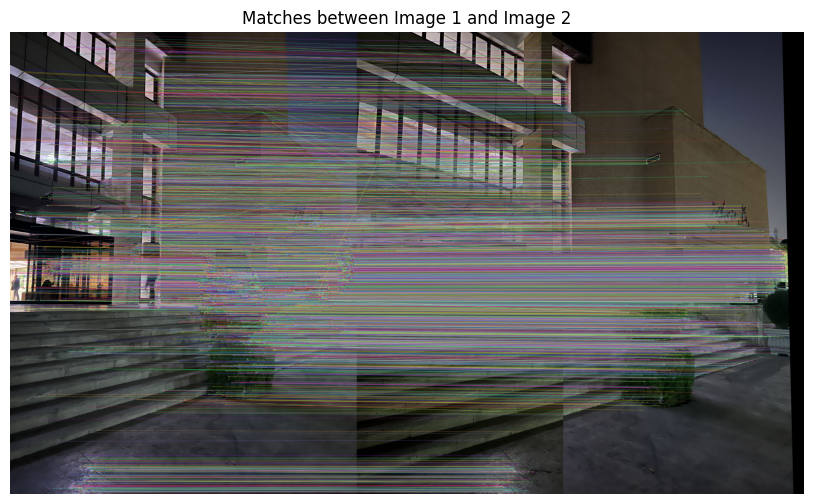

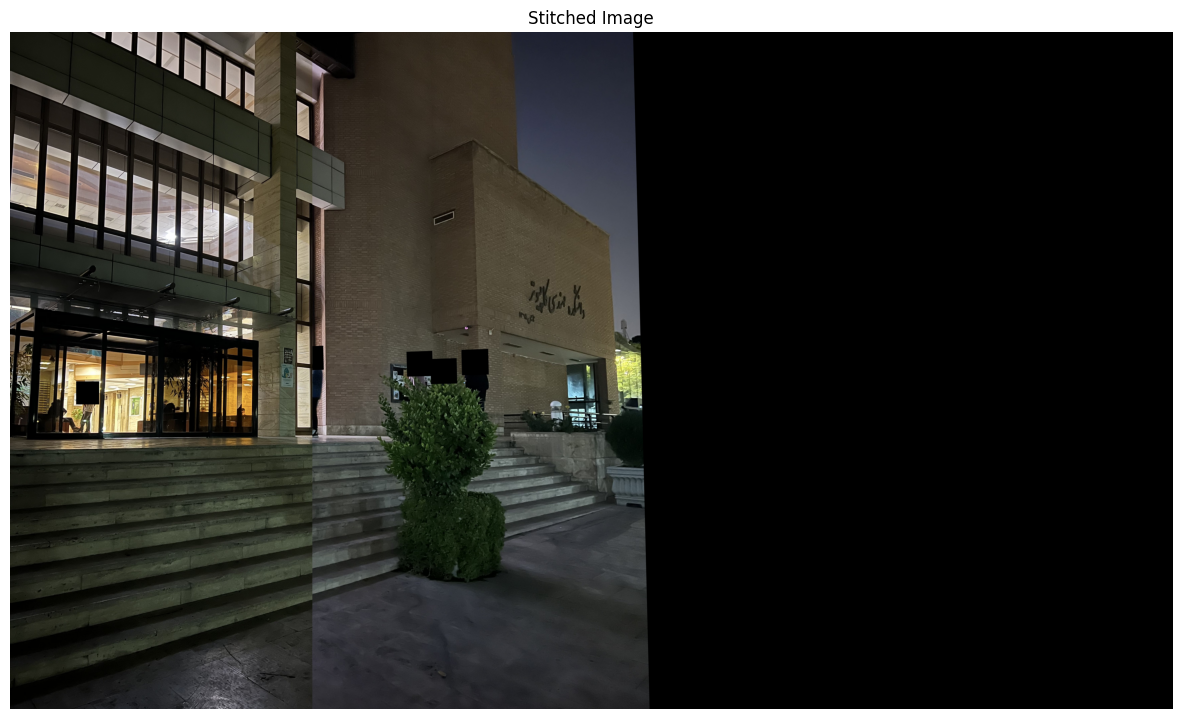

In [38]:
result_final = stitch_images(img4, result2)